In [8]:
# https://scikit-image.org/docs/0.11.x/auto_examples/plot_gabors_from_astronaut.html

import numpy as np
from scipy.cluster.vq import kmeans2
from scipy import ndimage as ndi
import matplotlib.pyplot as plt

from skimage import data
from skimage import color
from skimage.util.shape import view_as_windows
from skimage.util import montage

import torch
from torch import Tensor, cat, no_grad, manual_seed
from torch.nn import Linear, MSELoss, Softmax
from torch.optim import LBFGS
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch.optim as optim


astro shape (512, 512)


/home/mano/fieldgenie/code/QCNNModelForCanonicalComputation/.canonical/lib/python3.11/site-packages/scipy/cluster/vq.py:602: UserWarning: One of the clusters is empty. Re-run kmeans with a different initialization.
  warnings.warn("One of the clusters is empty. "


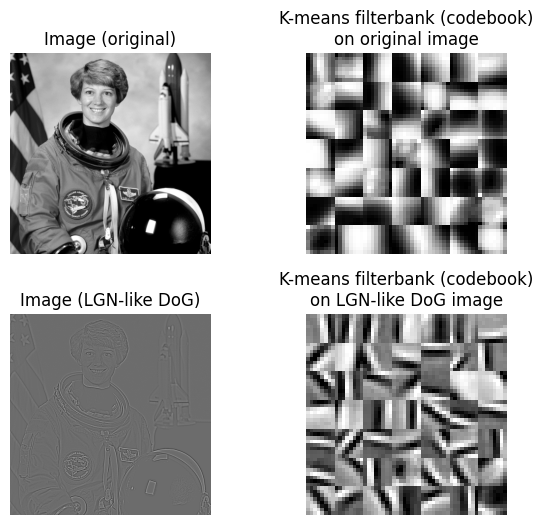

NameError: name 'BATCH_SIZE' is not defined

In [12]:
np.random.seed(42)

patch_shape = 8, 8
n_filters = 49

astro = color.rgb2gray(data.astronaut())
print("astro shape", astro.shape)

# -- filterbank1 on original image
patches1 = view_as_windows(astro, patch_shape)
patches1 = patches1.reshape(-1, patch_shape[0] * patch_shape[1])[::8]
fb1, _ = kmeans2(patches1, n_filters, minit='points')
fb1 = fb1.reshape((-1,) + patch_shape)
fb1_montage = montage(fb1, rescale_intensity=True)

# -- filterbank2 LGN-like image
astro_dog = ndi.gaussian_filter(astro, .5) - ndi.gaussian_filter(astro, 1)
patches2 = view_as_windows(astro_dog, patch_shape)
patches2 = patches2.reshape(-1, patch_shape[0] * patch_shape[1])[::8]
fb2, _ = kmeans2(patches2, n_filters, minit='points')
fb2 = fb2.reshape((-1,) + patch_shape)
fb2_montage = montage(fb2, rescale_intensity=True)

# --
fig, axes = plt.subplots(2, 2, figsize=(7, 6))
ax0, ax1, ax2, ax3 = axes.ravel()

ax0.imshow(astro, cmap=plt.cm.gray)
ax0.set_title("Image (original)")

ax1.imshow(fb1_montage, cmap=plt.cm.gray, interpolation='nearest')
ax1.set_title("K-means filterbank (codebook)\non original image")

ax2.imshow(astro_dog, cmap=plt.cm.gray)
ax2.set_title("Image (LGN-like DoG)")

ax3.imshow(fb2_montage, cmap=plt.cm.gray, interpolation='nearest')
ax3.set_title("K-means filterbank (codebook)\non LGN-like DoG image")

for ax in axes.ravel():
    ax.axis('off')

fig.subplots_adjust(hspace=0.3)
plt.show()


Files already downloaded and verified
X_train.data (20000, 32, 32, 3)
images shape torch.Size([256, 1, 32, 32])


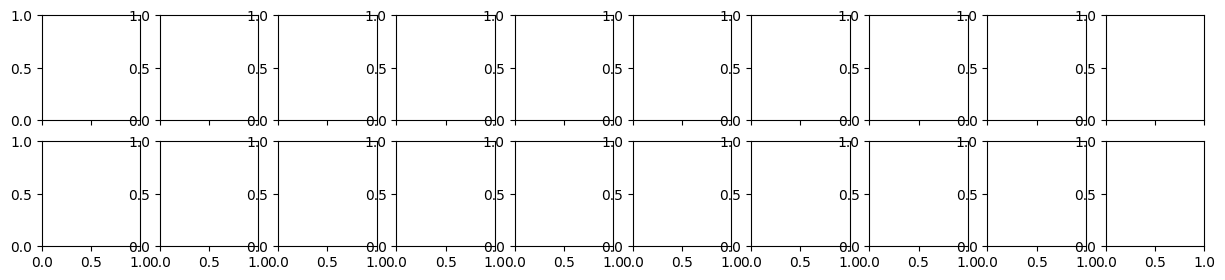

In [14]:
manual_seed(42)
CLASSES = 4
batch_size = 256
n_samples = CLASSES * 10000  # We will concentrate on the first 6000 * CLASSES samples


X_train = datasets.CIFAR10(
    root="./data", train=True, download=True, transform=transforms.Compose([transforms.Grayscale(num_output_channels=1), transforms.ToTensor()])
)

idx = np.where(np.array(X_train.targets) < CLASSES)[0][:n_samples]
X_train.data = X_train.data[idx]
X_train.targets = np.array(X_train.targets)[idx]

print("X_train.data", X_train.data.shape)
# Define torch dataloader with filtered data
train_loader = DataLoader(X_train, batch_size=batch_size, shuffle=True)


n_samples_show = 10

data_iter = iter(train_loader)
fig, axes = plt.subplots(nrows=2, ncols=n_samples_show, sharex=True, figsize=(15, 3))
images, targets = data_iter.__next__()
print("images shape", images.shape)


originalImage (32, 32)


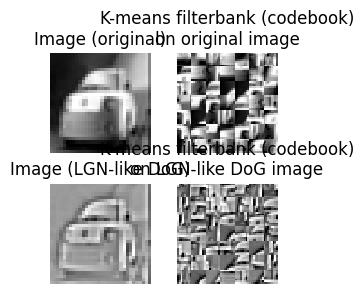

In [20]:
originalImage = images[2,0].numpy()
print("originalImage", originalImage.shape)
patches1 = view_as_windows(originalImage, patch_shape)
patches1 = patches1.reshape(-1, patch_shape[0] * patch_shape[1])[::8]
fb1, _ = kmeans2(patches1, n_filters, minit='points')
fb1 = fb1.reshape((-1,) + patch_shape)
fb1_montage = montage(fb1, rescale_intensity=True)

# -- filterbank2 LGN-like image
astro_dog = ndi.gaussian_filter(originalImage, .5) - ndi.gaussian_filter(originalImage, 1)
patches2 = view_as_windows(astro_dog, patch_shape)
patches2 = patches2.reshape(-1, patch_shape[0] * patch_shape[1])[::8]
fb2, _ = kmeans2(patches2, n_filters, minit='points')
fb2 = fb2.reshape((-1,) + patch_shape)
fb2_montage = montage(fb2, rescale_intensity=True)

fig, axes = plt.subplots(2, 2, figsize=(3, 3))
ax0, ax1, ax2, ax3 = axes.ravel()

ax0.imshow(originalImage, cmap=plt.cm.gray)
ax0.set_title("Image (original)")

ax1.imshow(fb1_montage, cmap=plt.cm.gray, interpolation='nearest')
ax1.set_title("K-means filterbank (codebook)\non original image")

ax2.imshow(astro_dog, cmap=plt.cm.gray)
ax2.set_title("Image (LGN-like DoG)")

ax3.imshow(fb2_montage, cmap=plt.cm.gray, interpolation='nearest')
ax3.set_title("K-means filterbank (codebook)\non LGN-like DoG image")

for ax in axes.ravel():
    ax.axis('off')

fig.subplots_adjust(hspace=0.3)
plt.show()


In [23]:
# Define model, optimizer, and loss function
# features = torch.zeros(len(train_loader.dataset), TOTAL_FEATURES, SIMPLE_NEURONS_PER_FEATURE_PER_ROW, SIMPLE_NEURONS_PER_FEATURE_PER_ROW)
features = torch.tensor(())
print("features", features.shape)
x = torch.zeros(2, 4, 3, 3)
features = torch.cat((features, x), 0)
print("features", features.shape)
x = torch.zeros(2, 4, 3, 3)
features = torch.cat((features, x), 0)
print("features", features.shape)
x = torch.zeros(2, 4, 3, 3)
features = torch.cat((features, x), 0)
print("features", features.shape)

x = torch.zeros(2, 4, 3, 3)
features = torch.cat((features, x), 0)
print("features", features.shape)


features torch.Size([0])
features torch.Size([2, 4, 3, 3])
features torch.Size([4, 4, 3, 3])
features torch.Size([6, 4, 3, 3])
features torch.Size([8, 4, 3, 3])
